<a href="https://colab.research.google.com/github/luisgdelafuente/aliencontact/blob/main/number%20of%20civilizations%20in%20cube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

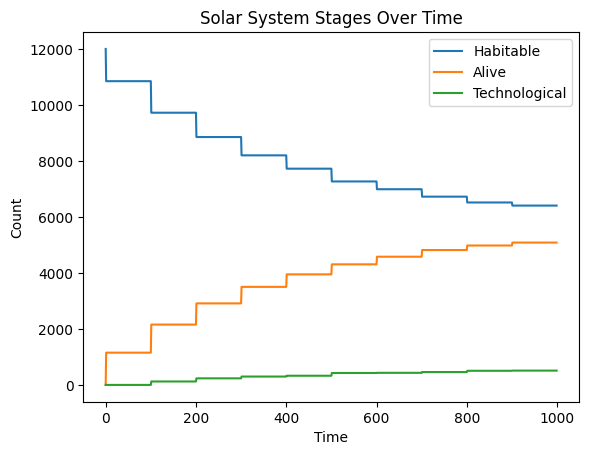

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_solar_systems = 12000
transition_probability = 0.10
technological_lifetime = 10
total_time = 1000
time_step = 100

# Stages
HABITABLE = 0
ALIVE = 1
TECHNOLOGICAL = 2

# Initialize solar systems
solar_systems = np.zeros(initial_solar_systems)

# Store counts for each stage
habitable_count = []
alive_count = []
technological_count = []

# Simulation
for t in range(total_time):
    # Update counts
    habitable_count.append(np.sum(solar_systems == HABITABLE))
    alive_count.append(np.sum(solar_systems == ALIVE))
    technological_count.append(np.sum(solar_systems == TECHNOLOGICAL))

    # Update stages
    if t % time_step == 0:
        for i in range(len(solar_systems)):
            # Transition from habitable to alive
            if solar_systems[i] == HABITABLE and np.random.rand() < transition_probability:
                solar_systems[i] = ALIVE
            # Transition from alive to technological
            elif solar_systems[i] == ALIVE and np.random.rand() < transition_probability:
                solar_systems[i] = TECHNOLOGICAL
            # Transition from technological to habitable
            elif solar_systems[i] == TECHNOLOGICAL and (t - solar_systems[i]) >= technological_lifetime:
                solar_systems[i] = HABITABLE

# Plot the results
plt.plot(habitable_count, label="Habitable")
plt.plot(alive_count, label="Alive")
plt.plot(technological_count, label="Technological")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.title("Solar System Stages Over Time")
plt.show()


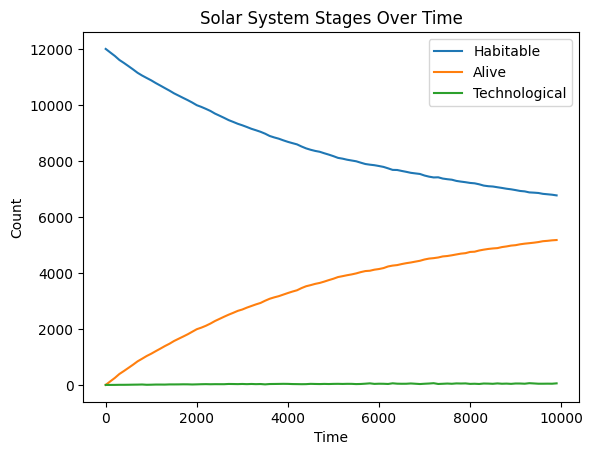

,Time,Habitable,Alive,Technological
0,0,12000,0,0
1,100,11874,126,0
2,200,11750,249,1
3,300,11606,390,4
4,400,11499,497,4
...,...,...,...,...
95,9500,6855,5102,43
96,9600,6824,5133,43
97,9700,6809,5146,45
98,9800,6793,5164,43


In [24]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
initial_solar_systems = 12000
transition_probability = 0.01
technological_lifetime = 10
total_time = 10000
time_step = 100

# Stages
HABITABLE = 0
ALIVE = 1
TECHNOLOGICAL = 2

# Initialize solar systems and technological_time again
solar_systems = np.zeros(initial_solar_systems)
technological_time = np.zeros(initial_solar_systems, dtype=int)

# Store counts for each stage
habitable_count = []
alive_count = []
technological_count = []

# Simulation
for t in range(0, total_time, time_step):  # Iterate with a step size of time_step
    # Update counts
    habitable_count.append(np.sum(solar_systems == HABITABLE))
    alive_count.append(np.sum(solar_systems == ALIVE))
    technological_count.append(np.sum(solar_systems == TECHNOLOGICAL))

    for i in range(len(solar_systems)):
        # Transition from habitable to alive
        if solar_systems[i] == HABITABLE and np.random.rand() < transition_probability:
            solar_systems[i] = ALIVE
        # Transition from alive to technological
        elif solar_systems[i] == ALIVE and np.random.rand() < transition_probability:
            solar_systems[i] = TECHNOLOGICAL
            technological_time[i] = t  # Store the time when the transition occurred
        # Transition from technological to habitable
        elif solar_systems[i] == TECHNOLOGICAL and (t - technological_time[i]) >= technological_lifetime:
            solar_systems[i] = HABITABLE

# Plot the results
plt.plot(range(0, total_time, time_step), habitable_count, label="Habitable")
plt.plot(range(0, total_time, time_step), alive_count, label="Alive")
plt.plot(range(0, total_time, time_step), technological_count, label="Technological")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.title("Solar System Stages Over Time")
plt.show()

# Create a Pandas DataFrame to store the results
results_df_corrected = pd.DataFrame({
    'Time': range(0, total_time, time_step),
    'Habitable': habitable_count,
    'Alive': alive_count,
    'Technological': technological_count
})

# Display the complete table with 10 rows
results_df_corrected

